# Messing with cosmoDC2 Files and getting Halo Information

In [2]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
%matplotlib inline

In [3]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [4]:
# setting up ccl
cosmo = ccl.Cosmology(
    Omega_c=gc.cosmology.Om0-gc.cosmology.Ob0, 
    Omega_b=gc.cosmology.Ob0, 
    h=gc.cosmology.h, 
    sigma8=gc.cosmology.sigma8, 
    n_s=gc.cosmology.n_s, 
    transfer_function='bbks',)

In [5]:
data = gc.get_quantities(['halo_mass', 'halo_id', 'redshift', 'galaxy_id', 'is_central', 'position_x', 'position_y', 'position_z', 'ra_true', 'dec_true'])

In [6]:
print(data.keys())

dict_keys(['ra_true', 'is_central', 'position_y', 'halo_id', 'halo_mass', 'galaxy_id', 'position_x', 'position_z', 'dec_true', 'redshift'])


In [6]:
print(data['halo_id'])
print(len(data['halo_id']))

[         155487       100155487       200155487 ... -63850200143121
 -63850300143121 -63850400143121]
292781506


In [8]:
# using set to get only unique Halos
unique_halo_ids, unique_index = np.unique(data['halo_id'], return_index=True)
print(len(unique_halo_ids))

282044971


In [9]:
sorted_mass = np.sort(data['halo_mass'][unique_index])

In [13]:
largest_mass_i = np.where(data['halo_mass']==sorted_mass[-1])
print(largest_mass_i)

(array([1155685, 1155686, 1155687, 1155688, 1155689, 1155690, 1155691,
       1155692, 1155693, 1155694, 1155695, 1155696, 1155697, 1155698,
       1155699, 1155700, 1155701, 1155702, 1155703, 1155704, 1155705,
       1155706, 1155707, 1155708, 1155709, 1155710, 1155711, 1155712,
       1155713, 1155714, 1155715, 1155716, 1155717, 1155718, 1155719,
       1155720, 1155721, 1155722, 1155723, 1155724, 1155725, 1155726,
       1155727, 1155728, 1155729, 1155730, 1155731, 1155732, 1155733,
       1155734, 1155735, 1155736, 1155737, 1155738, 1155739, 1155740,
       1155741, 1155742, 1155743, 1155744, 1155745, 1155746, 1155747,
       1155748, 1155749, 1155750, 1155751, 1155752, 1155753, 1155754,
       1155755, 1155756, 1155757, 1155758, 1155759, 1155760, 1155761,
       1155762, 1155763, 1155764, 1155765, 1155766, 1155767, 1155768,
       1155769, 1155770, 1155771, 1155772, 1155773, 1155774, 1155775,
       1155776, 1155777, 1155778, 1155779, 1155780, 1155781, 1155782,
       1155783, 115

In [18]:
largest_halo_id = np.unique(data['halo_id'][largest_mass_i])[0]
print(largest_halo_id)

935700155279


In [25]:
print(gc.cosmology)

FlatLambdaCDM(H0=71.0 km / (Mpc s), Om0=0.2648, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=0.0448)


In [29]:
print(gc.halo_mass_def)

FoF, b=0.168


## Creating Halo Mass Function/Distribution

In [4]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
%matplotlib inline

In [5]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [6]:
#setting up the cosmology
cosmo = ccl.Cosmology(
    Omega_c=gc.cosmology.Om0-gc.cosmology.Ob0, 
    Omega_b=gc.cosmology.Ob0, 
    h=gc.cosmology.h, 
    sigma8=gc.cosmology.sigma8, 
    n_s=gc.cosmology.n_s, 
    transfer_function='bbks',)

In [7]:
data = gc.get_quantities(['halo_mass', 'stellar_mass', 'halo_id', 'redshift', 'galaxy_id', 'is_central'], filters=['redshift < 0.2'])

In [91]:
# hmf_dn_dlogm = ccl.massfunc(cosmo, mass_center, mean_scale_factor)
print(np.max(data['stellar_mass']))

2754090600000.0


In [16]:
# finding the highest redshift
#sorted_zs = np.sort(data['redshift'])
sorted_masses = np.sort(data['halo_mass'])

In [21]:
print((sorted_masses))

[8.88672321e+09 8.88672322e+09 8.88672324e+09 ... 1.32834633e+15
 1.32834633e+15 1.32834633e+15]


In [60]:
mass_bins = np.logspace(9, 16, 50)
mass_center = np.sqrt(mass_bins[1:] * mass_bins[:-1])

In [61]:
print(mass_bins)

[1.00000000e+09 1.38949549e+09 1.93069773e+09 2.68269580e+09
 3.72759372e+09 5.17947468e+09 7.19685673e+09 1.00000000e+10
 1.38949549e+10 1.93069773e+10 2.68269580e+10 3.72759372e+10
 5.17947468e+10 7.19685673e+10 1.00000000e+11 1.38949549e+11
 1.93069773e+11 2.68269580e+11 3.72759372e+11 5.17947468e+11
 7.19685673e+11 1.00000000e+12 1.38949549e+12 1.93069773e+12
 2.68269580e+12 3.72759372e+12 5.17947468e+12 7.19685673e+12
 1.00000000e+13 1.38949549e+13 1.93069773e+13 2.68269580e+13
 3.72759372e+13 5.17947468e+13 7.19685673e+13 1.00000000e+14
 1.38949549e+14 1.93069773e+14 2.68269580e+14 3.72759372e+14
 5.17947468e+14 7.19685673e+14 1.00000000e+15 1.38949549e+15
 1.93069773e+15 2.68269580e+15 3.72759372e+15 5.17947468e+15
 7.19685673e+15 1.00000000e+16]


In [62]:
# mean_scale_factor = 1.0/(1.0+data['redshift'].mean())
# hmf_dn_dlogm = ccl.massfunc(cosmo, mass_center, mean_scale_factor)
# print(hmf_dn_dlogm)

In [64]:
# n_count_binned = np.zeros(len(mass_bins))
# for i in range(len(mass_bins)-1):
#     count = len(np.where( (data['halo_mass'] >= mass_bins[i]) & (data['halo_mass'] < mass_bins[i+1]) )[0])
#     n_count_binned[i] += count



In [72]:
n_counts = np.histogram(data['halo_mass'], mass_bins)[0]
print(n_counts)

[       0        0        0        0        0        0 41318718 80879662
 56270219 35726038 19278700  9239127 12436907  8793701  5668006  4117105
  3099444  2510199  2183034  1888551  1665734  1435610  1224889  1031499
   843741   691078   559909   445640   364440   285099   216841   170939
   126461    90623    82161    53878    33000    22245    12781    10080
     3806     1025      616        0        0        0        0        0
        0]


In [81]:
#print(n_count_binned)
zero_vals = np.where(n_counts == 0)
n = (np.delete(n_counts, zero_vals[0]))
print(len(n_counts))
print(len(mass_bins[0:-1]))

49
49


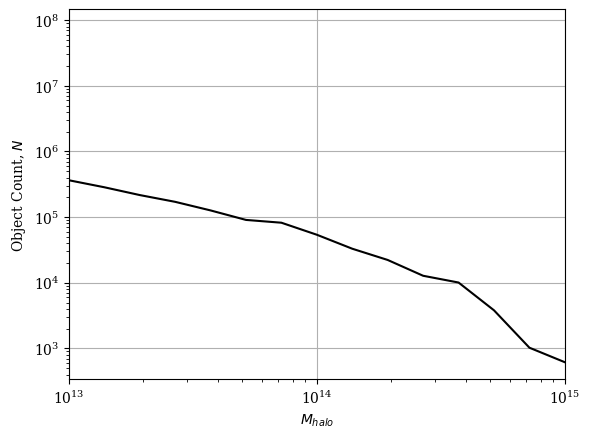

In [95]:
# plotting
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$M_{halo}$')
ax.set_ylabel('Object Count, $N$')

ax.loglog(np.delete(mass_bins[0:-1], zero_vals[0]), n, c='black')
ax.grid('on')
ax.set_xlim(10**13, 10**15)

plt.savefig('MassFunction.png')
plt.show()

test


In [7]:
## checking if iscentral is what we think it is
central_ra = data['ra_true'][np.where((data['is_central']) & (data['halo_id'] == 935700155279))]
central_dec = data['dec_true'][np.where((data['is_central']) & (data['halo_id'] == 935700155279))]

ra = data['ra_true'][np.where((data['is_central']==False) & (data['halo_id'] == 935700155279))]
dec = data['dec_true'][np.where((data['is_central']==False) & (data['halo_id'] == 935700155279))]

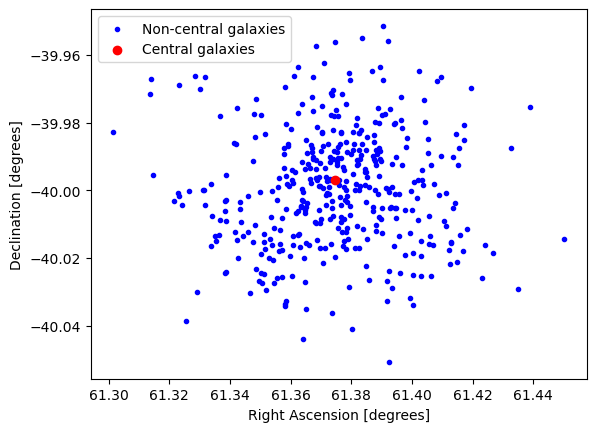

In [9]:
#plotting radec
fig, ax = plt.subplots()
ax.scatter(ra, dec, label='Non-central galaxies', c='blue', marker='.')
ax.scatter(central_ra, central_dec, label='Central galaxies', c='red', marker='o')
ax.set_xlabel('Right Ascension [degrees]'); ax.set_ylabel('Declination [degrees]')

plt.legend()
plt.show()

In [21]:
## okay so now for working with the halos, we're only gonna do the central galaxies
data_cut = np.where((data['is_central']) & (data['halo_mass'] >= 10**14) )

## visualizing xyz, going to scale by halo_mass
s = data['halo_mass'][data_cut]
x = data['position_x'][data_cut]; y = data['position_y'][data_cut]; z = data['position_z'][data_cut]

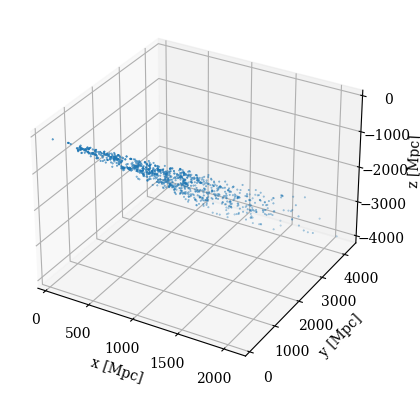

1028


In [41]:
#plotting 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x [Mpc]'); ax.set_ylabel('y [Mpc]'); ax.set_zlabel('z [Mpc]')

s_min = np.min(s)
s_max = np.max(s)
sct = ax.scatter(x,y,z, marker='.', s=0.75) #, c=s, vmin=10**14, vmax = 2*10**14)

#fig.colorbar(sct)
plt.savefig('xyz.png')
plt.show()

print(len(data_cut[0]))

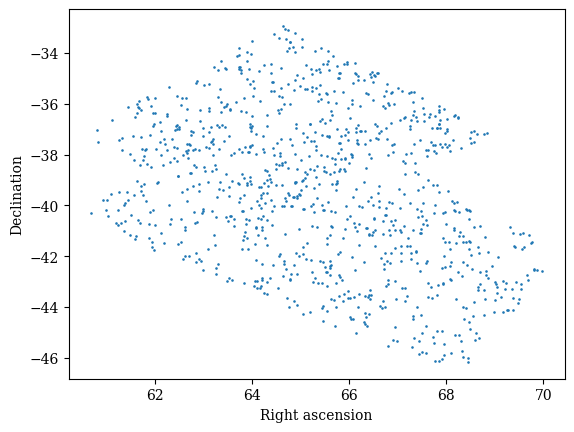

In [42]:
fig, ax = plt.subplots()
ax.scatter(data['ra_true'][data_cut], data['dec_true'][data_cut], s=0.75)
ax.set_xlabel('Right ascension'); ax.set_ylabel('Declination')
plt.show()

This is probably correct (both) as it is a lightcone we're looking at

In [43]:
# generating a mass function because I'm curious now
cut_mass_bins = np.logspace(14, 16, 50)

n_counts_cut = np.histogram(data['halo_mass'][data_cut], cut_mass_bins)[0]

zero_vals_cut = np.where(n_counts_cut == 0)
n_cut = (np.delete(n_counts_cut, zero_vals_cut[0]))

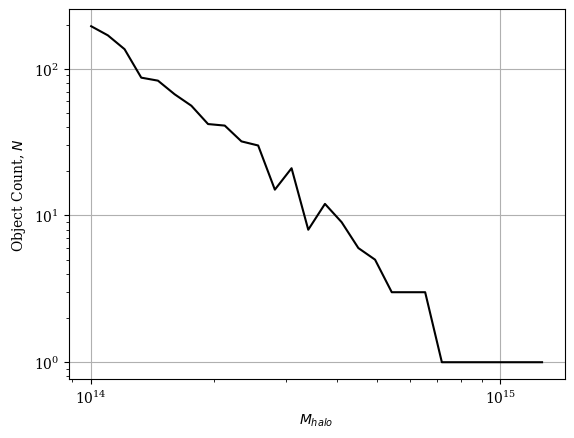

In [44]:
fig, ax = plt.subplots()
plt.rcParams['font.family'] ='serif'
ax.set_xlabel('$M_{halo}$')
ax.set_ylabel('Object Count, $N$')

ax.loglog(np.delete(cut_mass_bins[0:-1], zero_vals_cut[0]), n_cut, c='black')
ax.grid('on')

plt.savefig('MassFunction_Centrals.png')
plt.show()